# logistic regression example

## 출처 : https://wooiljeong.github.io/ml/tf2_4/  <- 해당 코드를 그대로 타이핑하면서 이해해보기

#### pandas, seaborn은 처음 보는 module이었다. 

### module import

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### train data 입력하기
#### array를 직접 입력할 때는 np.array 사용
#### 2차원 array 사용 && np.float32로 dtype 지정

In [3]:
x_train = np.array([[1.,1.],
                    [1.,2.],
                    [2.,1.],
                    [3.,2.],
                    [3.,3.],
                    [2.,3.]],
                  dtype = np.float32)
y_train = np.array([[0.],
                    [0.],
                    [0.],
                    [1.],
                    [1.],
                    [1.]],
                  dtype = np.float32)
x_test = np.array([[3.,0.],
                   [4.,1.]],
                 dtype = np.float32)
y_test = np.array([[0.],
                   [1.]],
                 dtype = np.float32)

### visualization(시각화 과정)

##### df에 각각 'x1', 'x2' 라는 이름의 column들을 만들고, x_train data를 할당함

In [4]:
df = pd.DataFrame(x_train, columns=['x1','x2'])
print(df)

    x1   x2
0  1.0  1.0
1  1.0  2.0
2  2.0  1.0
3  3.0  2.0
4  3.0  3.0
5  2.0  3.0


##### df에 'y'라는 이름의 column을 만들고, y_train data를 할당함

In [5]:
df['y'] = y_train
print(y_train)
print(df['y'])

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
5    1.0
Name: y, dtype: float32


##### test dataset도 마찬가지로 x, y를 할당

In [6]:
df_test = pd.DataFrame(x_test, columns=['x1','x2'])
df_test['y'] = y_test

### plt module로 그래프 그리기(plot을 설정하는 함수이지 종류를 구체적으로 지정한 함수는 아닌 듯)
##### 1. figsize로 plot 크기(inch단위) 설정
##### 2. sns.scatterplot으로 scatterplot 그리기  *  hue, color의 의미?
##### 3. plt.xlim, plt.ylim으로 x축, y축에 표시할 범위를 설정
##### 4. plt.legend로 범례를 표시할 위치 설정
##### 5. plt.show()로 plot을 보여줌

### scatterplot attributes 자세히 보기: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

##### 'hue'는 어떤 variable의 값을 기준으로 색깔을 다르게 할지를 의미한다.
##### -> hue = 'y'이면, y값이 다르면 data의 색을 다르게 표시한다는 의미이다. 그래서  hue와 color중 하나만 고를 수 있는 것 같다.
##### 's'는 data 점의 size를 의미한다. s값은 숫자인데, 값이 클수록 data 하나의 점 크기가 커진다.

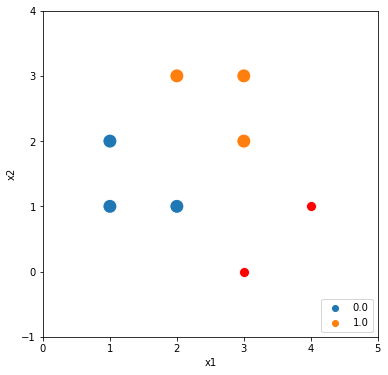

In [7]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='x1',y='x2',hue='y',data=df,s=200)
sns.scatterplot(x='x1',y='x2',color='red',data=df_test,s=100)
plt.xlim(0,5)
plt.ylim(-1,4)
plt.legend(loc='lower right')
plt.show()

### 변수 설정하기
##### 1. tf.Variable으로 변수 설정
##### 2. tf.random.set_seed()로 random seed 설정
##### 3. tf.random.normal([a,b]) : normal 분포에서 random하게 [a,b] 형테/matrix의 변수 지정


In [8]:
tf.random.set_seed(2000)
W = tf.Variable(tf.random.normal([2,1], mean = 0.0))
b = tf.Variable(tf.random.normal([1], mean = 0.0))

print(W.numpy())
print(b.numpy())

[[-0.3039583]
 [ 2.035347 ]]
[-0.478958]


### model training에 사용할 function 만들기

##### 1. tensorflow 2부터는 def으로 함수 직접 만들어서 해당 함수 적용 -> session, placeholder 사용X
##### 2. tf.matmul(matrix1, matrix2) : matrix끼리 곱해지는 함수. 
##### ** tf.matmul(A, B) != tf.matmul(B, A)

In [9]:
learning_rate = 0.01

def predict(X):
    z = tf.matmul(X, W) + b
    hypothesis = 1 / (1+tf.exp(-z))
    return hypothesis



### model training 시작

##### * 이전에 tf.GradientTape에서 뒤에 ()를 빼먹었는데, 그러면 AttributeError:__enter__ 이라는 에러가 발생한다.

In [13]:
for i in range(2001):
    
    with tf.GradientTape() as tape:  
        hypothesis = predict(x_train)
        cost = tf.reduce_mean(-tf.reduce_sum(y_train*tf.math.log(hypothesis) + (1-y_train)*tf.math.log(1-hypothesis)))
        W_grad, b_grad = tape.gradient(cost, [W,b])
        
        W.assign_sub(learning_rate*W_grad)
        b.assign_sub(learning_rate*b_grad)
        
    if i % 400 == 0:
        print("%s \nWeights : %s\nBias : %s\nCost: %s" % (i, W.numpy(), b.numpy(), cost.numpy()))

0 
Weights : [[-0.33346888]
 [ 2.0028284 ]]
Bias : [-0.5027872]
Cost: 6.185939
400 
Weights : [[0.61557525]
 [1.0534202 ]]
Bias : [-2.9519806]
Cost: 1.8920165
800 
Weights : [[1.1285322]
 [1.2219005]]
Bias : [-4.3645086]
Cost: 1.3099619
1200 
Weights : [[1.4153427]
 [1.4397296]]
Bias : [-5.3987374]
Cost: 1.007956
1600 
Weights : [[1.6239681]
 [1.6314763]]
Bias : [-6.2151127]
Cost: 0.8204323
2000 
Weights : [[1.7924588]
 [1.7950951]]
Bias : [-6.890104]
Cost: 0.6923404


### 학습한 모델로 Predict

##### 1. .numpy()를 하면 해당 입력된 수의 값을 출력하는 것 같다.
##### * 정확히 말하면, data가 Tensor로 입력되기 때문에 .numpy()가 없으면 숫자 값이 아니라 Tensor 값의 형태로 출력되어 알아보기 힘들다.
##### 2. tf.cast(조건, data type) 로 입력하고, 조건이 맞으면 1, 아니면 0을 출력한다.

In [18]:
hypo = predict(x_test)
print("Prob : \n" , (hypo.numpy()))
print("Result : \n", tf.cast(hypo>0.5, dtype = tf.float32).numpy())

Prob : 
 [[0.18053497]
 [0.8884323 ]]
Result : 
 [[0.]
 [1.]]


### Accuracy 측정

##### 1. tf.equal(A, B) : A와 B가 똑같은지 T/F으로 출력

In [22]:
def acc(hypo, label):
    prediction = tf.cast(hypo>0.5, dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, label), dtype=tf.float32))
    return accuracy

accuracy = acc(predict(x_test), y_test).numpy()
print(accuracy)

1.0
